## Quantum Reservoir Computing for Chaotic Dynamics
FYP Masters project by Raihaan Usman

In [24]:
from backend.solver import Lorentz, MFE, VDP, Slope
from backend import CRCM, QRCM

import numpy as np
import os;  os.environ["OMP_NUM_THREADS"] = '32' # Imposes cores
from matplotlib import pyplot as plt

#### Configuration for Lorentz system

In [25]:
# Data generation parameters
upsample        = 1                     # To increase the dt of the ESN wrt the numerical integrator
dt              = 0.005 * upsample      # Time step
params          = [8/3, 28, 10]         # Parameters for the Lorenz system

# Define N for washout, training, validation and testing
N_washout       = 50
N_train         = 1000
N_test          = 50
N_sets          = [N_washout, N_train, N_test]

# Instantiate the solver object
lor3 = Lorentz(params, dt, N_sets)

#### CRCM for Lorenz system

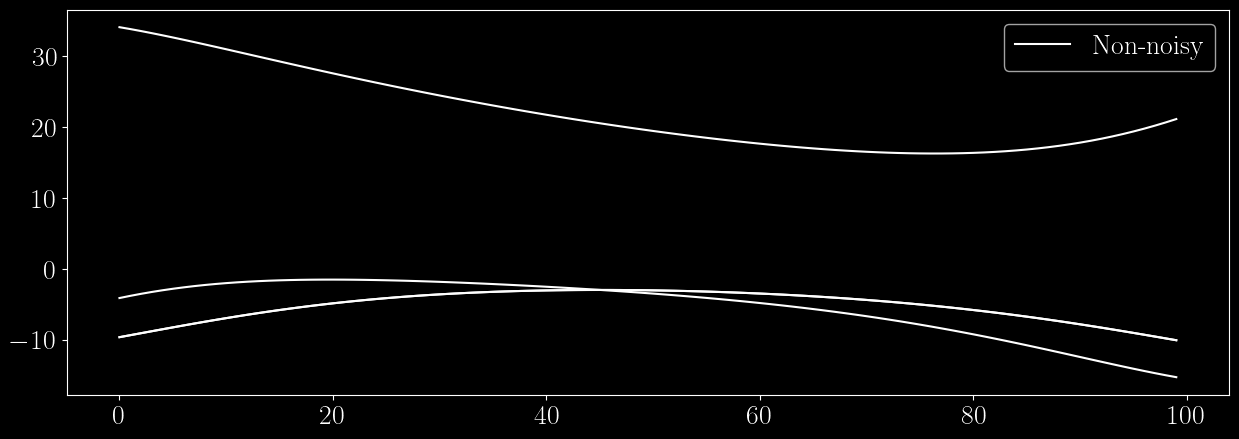

Train: 100%|██████████| 999/999 [00:00<00:00, 17521.94it/s]



Shape of W_out: (3, 200)
W_out: [[ 1.22990640e+00  2.83973092e-01 -2.07900765e+00 -6.94366095e-01
   8.07466255e-01 -5.68909650e-01 -2.13950949e-01  2.53720314e-01
  -6.21299596e-01  4.01954787e-01 -2.10980925e-01  3.10232611e+00
  -5.01237899e-01 -1.47085091e+00 -2.12160456e-01  5.05620393e-02
  -2.32200865e+00  7.08548102e+00  5.60391963e-01  4.25322031e+00
   1.17138569e+00 -3.38568754e+00  5.42963292e-01  2.51086919e-02
  -2.90681672e-01 -3.64750061e-02 -1.02032816e-01 -2.09065151e-01
  -8.98638759e-01  4.08624563e-01 -8.04953659e+00  8.57398492e-02
  -5.20898183e+00 -1.94371401e+00  4.29062400e+00  1.34748327e+00
  -8.89936011e-01 -3.83902268e-01  1.33414560e-02 -1.10400605e+00
   1.75766032e+00  1.00045144e+00 -2.40155591e-01 -2.09362096e-01
   6.22976255e+00  3.14884895e+00  2.09060841e-01  2.57620859e-01
  -1.00955131e-01 -2.12343391e-01 -2.84476104e+00  1.08478185e+00
   2.76689513e-01 -3.48499618e-01  2.12026880e-01  5.75403713e-02
   2.90903212e-01 -2.12167567e-01  2.151250

Closed Loop: 100%|██████████| 49/49 [00:00<00:00, 6122.89it/s]

MSE: 120.93412087551505


In [26]:
# Initialise the ESN
crcm = CRCM(solver=lor3,
            N_units=200,
            connectivity=5,
            seed=0)

# Train the ESN with the training data
crcm.train(override=True)
crcm.forward()

#### QRCM for Lorenz system

In [27]:
# # Instantiate the solver object
# lor3 = VDP(params, dt, N_sets)

# # Instantiate the QRCM object
# qrcm = QRCM(solver  = lor3,
#             qubits  = 6,
#             eps     = 0.01,
#             tik     = 1e-6)

# # Train the QRCM with the training data
# qrcm.train(override=True)
# qrcm.forward()

#### Output Rendering

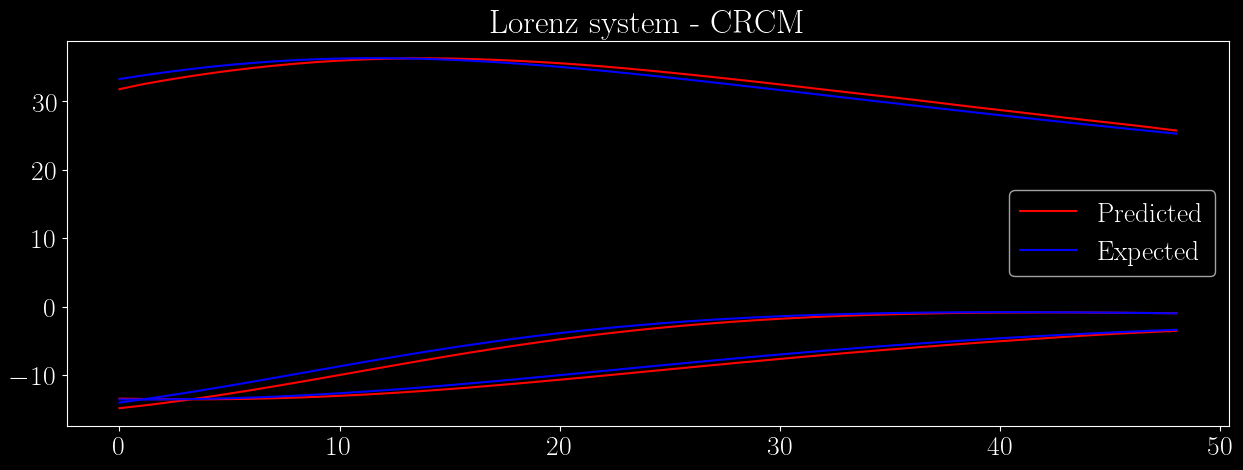

(49, 3)


In [31]:
# Plot the data in Y_train_pred
Y_pred = crcm.Y_pred

# Get expected output
Y_test = lor3.Y["Test"]

# Make a new figure
plt.figure()
plt.plot(Y_pred[:, 0], label="Predicted", color="red")
plt.plot(Y_pred[:, 1:], color="red")

# Overlay the expected output
plt.plot(Y_test[:, 0], label="Expected", color="blue")
plt.plot(Y_test[:, 1:], color="blue")

plt.title("Lorenz system - CRCM")
plt.legend()

# save the figure - dpi of 300 is good for printing
plt.savefig("..\Quantum Turbulence Learning\Diagrams\CRCM_Lorenz.png", dpi=300)

plt.show()

print(Y_pred.shape)